In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

#### Reading the dataset

In [13]:
df = pd.read_csv('../ExploratoryAnalysisTips/tips.csv')
df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251


#### Extract all total_bill column into a new series

In [4]:
# @title{vertical-output : true}

total_bill_series = df['total_bill']
print(total_bill_series.head())

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64


#### Calculate mean and standard deviation

In [5]:
# @title{vertical-output : true}

mu, std = total_bill_series.mean(), total_bill_series.std()
print(mu, std)

19.78594262295082 8.902411954856856


#### Calcualte z-socre for each value

In [6]:
# @title{vertical-output : true}

z_score = (total_bill_series - mu) / std
print(z_score.head())

0   -0.314066
1   -1.061054
2    0.137497
3    0.437416
4    0.539635
Name: total_bill, dtype: float64


#### Plot normal distribution graph of total bill

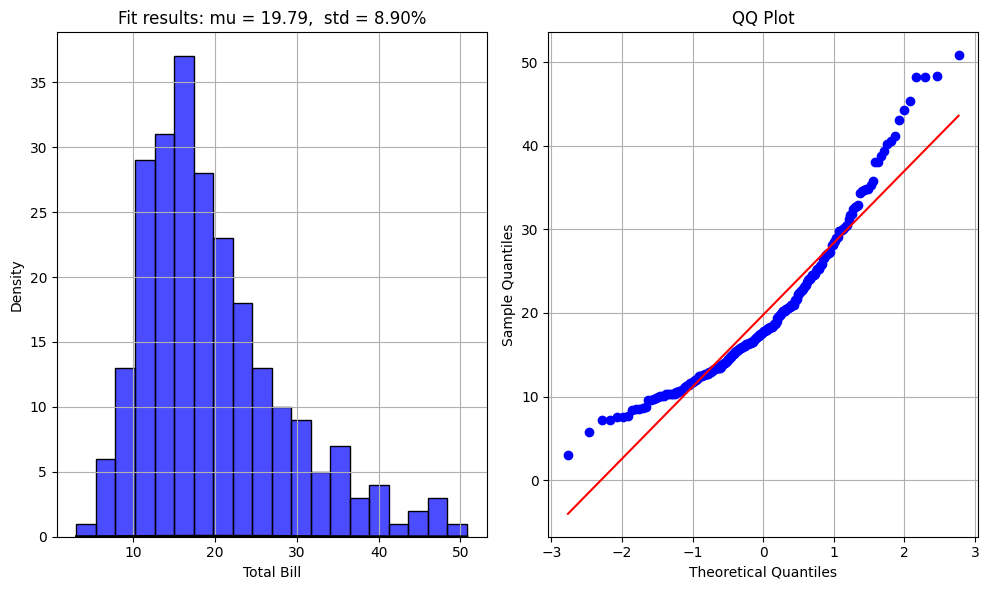

In [7]:
# @title{vertical-output : true}

plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(total_bill_series, bins=20, alpha=0.7, color='blue', edgecolor='black')

# Fit the normal distribution to the data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x,p,'k',linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}%"
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.grid(True)


# QQ plot
plt.subplot(1, 2, 2)
stats.probplot(total_bill_series, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plot grph showing mean +/- 3*SD

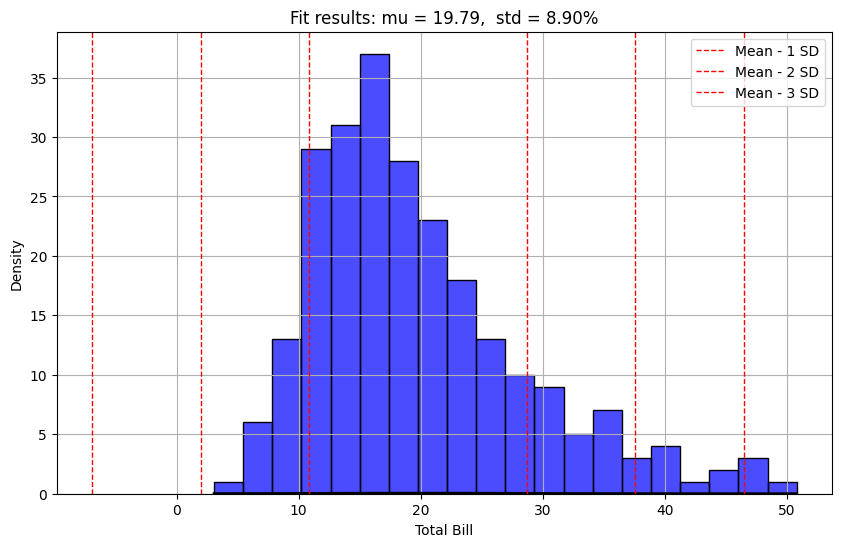

In [8]:
# @title{vertical-output : true}

plt.figure(figsize=(10, 6))
sns.histplot(total_bill_series, bins=20, alpha=0.7, color='blue', edgecolor='black')

# Fit normal distribution to the data
x= np.linspace(total_bill_series.min(), total_bill_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x,p,'k',linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}%"
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.grid(True)


# Plot mean +/- 3*SD
for i in range(1, 4):
    plt.axvline(mu + i * std, color='red', linestyle='--', linewidth=1, label=f'Mean - {i} SD')
    plt.axvline(mu - i * std, color='red', linestyle='--', linewidth=1)

plt.legend()
plt.show()

#### Check if mean +/-SD, mean +/-2SD, mean +/-3SD satisfy the empirical rule

In [9]:
# @title{vertical-output : true}

within_1sd = (z_score <=1 ) & (z_score >= -1)
within_2sd = (z_score <=2 ) & (z_score >= -2)
within_3sd = (z_score <=3 ) & (z_score >= -3)

perentage_within_1sd = (within_1sd.sum() / len(z_score)) * 100
perentage_within_2sd = (within_2sd.sum() / len(z_score)) * 100
perentage_within_3sd = (within_3sd.sum() / len(z_score)) * 100

print(f'Percentage of data eithon mean +-SD : {perentage_within_1sd:.2f}%')
print(f'Percentage of data eithon mean +-2SD : {perentage_within_2sd:.2f}%')
print(f'Percentage of data eithon mean +-3SD : {perentage_within_3sd:.2f}%')


Percentage of data eithon mean +-SD : 72.13%
Percentage of data eithon mean +-2SD : 94.26%
Percentage of data eithon mean +-3SD : 98.36%


#### Create DataFrame to store, z-socre, and within_1sd, within_2sd, within_3sd flags

In [10]:
# @title{vertical-output : true}

result_df = pd.DataFrame({
    'total_bill':total_bill_series,
    'z_score':z_score,
    'within_1sd':within_1sd,
    'within_2sd':within_2sd,
    'within_3sd':within_3sd
})

print(result_df.head())

# Deleting the file of exist
if os.path.exists('z_score_tips_dataset.csv'):
    os.remove('z_score_tips_dataset.csv')

result_df.to_csv('z_score_tips_dataset.csv', index=False)

   total_bill   z_score  within_1sd  within_2sd  within_3sd
0       16.99 -0.314066        True        True        True
1       10.34 -1.061054       False        True        True
2       21.01  0.137497        True        True        True
3       23.68  0.437416        True        True        True
4       24.59  0.539635        True        True        True


#### Find outliers


In [11]:
outluers = result_df[(result_df['z_score'] < -3) | (result_df['z_score'] > 3)]
print(outluers)

     total_bill   z_score  within_1sd  within_2sd  within_3sd
59        48.27  3.199589       False       False       False
156       48.17  3.188356       False       False       False
170       50.81  3.484905       False       False       False
212       48.33  3.206329       False       False       False


#### Outliers z-socre boxplot

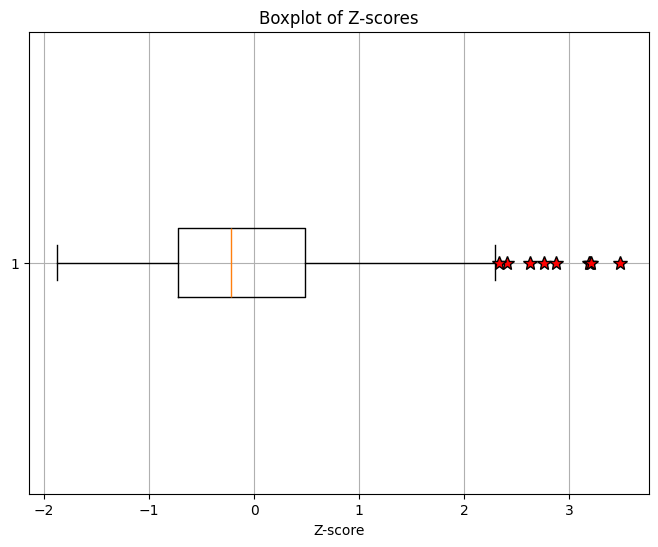

In [12]:
plt.figure(figsize=(8,6))
# vert=False                    indicates tht the boxplot will be dwrawn horizontally
# marker='*'                    Set the marker style for the outlier to a star('*')
# markerfacecolor='red'         Set the color if the marker face for the outliers to red
plt.boxplot(
    result_df['z_score'],
    vert=False,
    flierprops=dict(
        marker='*',
        markerfacecolor='red',
        markersize=10
    )
)
plt.xlabel('Z-score')
plt.title('Boxplot of Z-scores')
plt.grid(True)
plt.show()